# Дипломная работа по курсу Python

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
# создание цветовой карты из сегментов линейного отображения
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

* Пункт 1

Загрузите файл HR.csv в pandas dataframe.

In [4]:
data = pd.read_csv(r'C:\Users\Urmas\Desktop\Jupyter\Diplom\HR.csv', encoding = 'utf-8')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* Признаки

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

In [5]:
# проверяю на пропуски
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [6]:
data = data.apply(lambda column: pd.to_numeric(column, errors = 'ignore'), axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Пункт 2

Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [7]:
# функция Dataframe. ... describe() выводит: количество строк(данных), среднеарифметическое значение, стандартное (среднеквадратичное) отклонение, максимальную и минимальную величину, 1-3 квартиль (2-я квартиль - это медиана)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# мода (по всем столбцам)
moda = data.round().mode()
moda

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1.0,1.0,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


* Пункт 3

Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [9]:
# выведем датафрейм с количественными переменными
data_quantitative = data.iloc[:, 0:5]
data_quantitative

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3
...,...,...,...,...,...
14994,0.40,0.57,2,151,3
14995,0.37,0.48,2,160,3
14996,0.37,0.53,2,143,3
14997,0.11,0.96,6,280,4


In [19]:
# вычислим попарную корреляцию столбцов (DataFrame корреляционная матрица)
data_quantitative.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


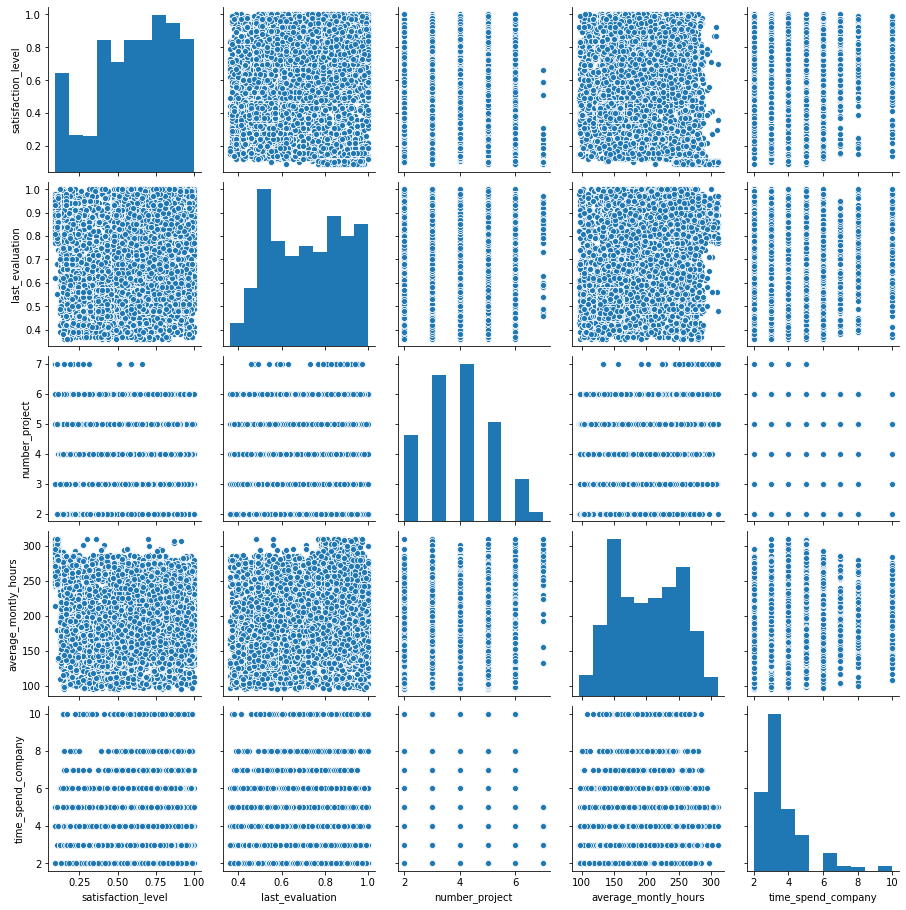

In [14]:
# построим парные отношения в наборе данных
sns.pairplot(data_quantitative)

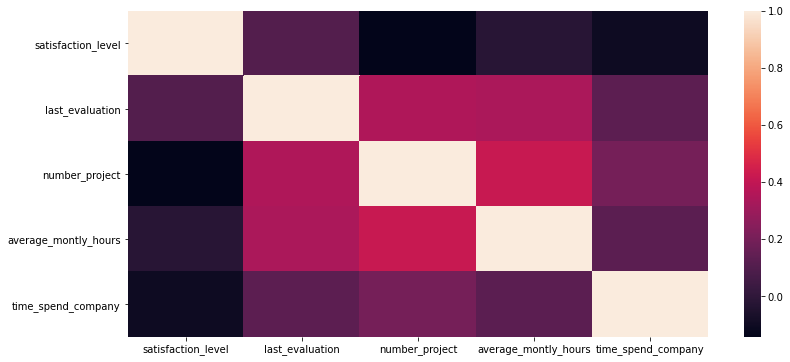

In [12]:
# проанализируем коэффициент корреляции data_quantitative (степень совместного изменения) с помощью тепловой карты
#коэффициент корреляции -1 <= r <= 1, 
# где 0 - полнное отсутствие взаимосвязи, 
# 1 (-1) - абсолютно положительная (отрицательная) взаимосвязь

sns.heatmap(data_quantitative.corr())

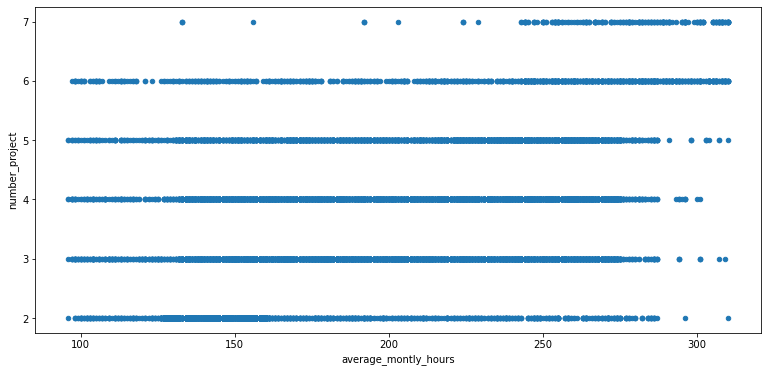

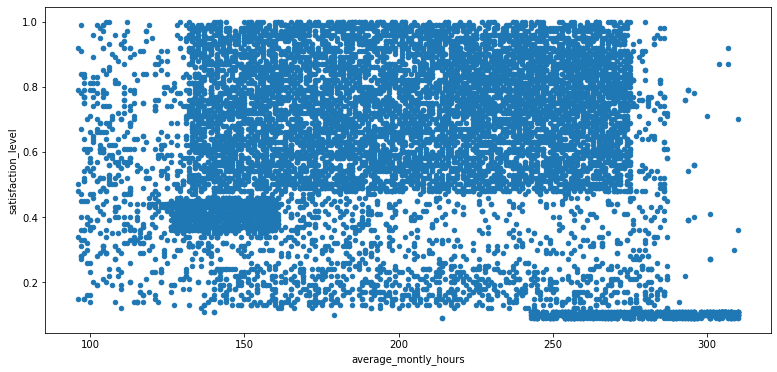

In [21]:
# из расчетов и визуализации выше определяем:
# 'number_project' и 'average_montly_hours' - как две самые скоррелированные величины data_quantitative
# 'satisfaction_level' и 'average_montly_hours' - как две наименее скоррелированные величины data_quantitative
# проверим

# построим точечный график (визуализацию) для изучения взаимосвязи 'number_project' и 'average_montly_hours', 'satisfaction_level' и 'average_montly_hours'
data_quantitative.plot(kind='scatter', x='average_montly_hours', y='number_project')
data_quantitative.plot(kind='scatter', x='average_montly_hours', y='satisfaction_level')

In [29]:
# считаем коэффициент корреляции Пирсона
data_quantitative[['average_montly_hours', 'number_project']].corr()

,average_montly_hours,number_project
average_montly_hours,1.000000,0.417211
number_project,0.417211,1.000000


In [30]:
data_quantitative[['average_montly_hours', 'satisfaction_level']].corr()

,average_montly_hours,satisfaction_level
average_montly_hours,1.000000,-0.020048
satisfaction_level,-0.020048,1.000000


In [31]:
# считаем коэффициент корреляции Спирмена
data_quantitative[['average_montly_hours', 'number_project']].corr(method='spearman')

,average_montly_hours,number_project
average_montly_hours,1.000000,0.397855
number_project,0.397855,1.000000


In [32]:
data_quantitative[['average_montly_hours', 'satisfaction_level']].corr(method='spearman')

,average_montly_hours,satisfaction_level
average_montly_hours,1.000,0.062
satisfaction_level,0.062,1.000


* Пункт 4

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [67]:
# работающие (не уволенные) сотрудники имеют аргумент "0"
# отфильтруем работающих сотрудников, сгруппируем по департаментам и посчитаем искомое количество
staff = data[data['left']==0].groupby('department').left.count()
staff

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: left, dtype: int64

* Пункт 5

Показать распределение сотрудников по зарплатам.

In [51]:
# приведем распределение зарплат относительно работающих сотрудников
# по количеству человек
salary = data[data['left']==0].groupby('salary').salary.count().sort_values(ascending=False)
# в процентном выражении
salary2 = data[data['left']==0].salary.value_counts(normalize=True).sort_values(ascending=False).round(3)
for i, ii in salary.items():
    for j, jj in salary2.items():
        if i==j:
            print(f'{i}: {ii} (чел.) - {jj} (%)')

low: 5144 (чел.) - 0.45 (%)
medium: 5129 (чел.) - 0.449 (%)
high: 1155 (чел.) - 0.101 (%)


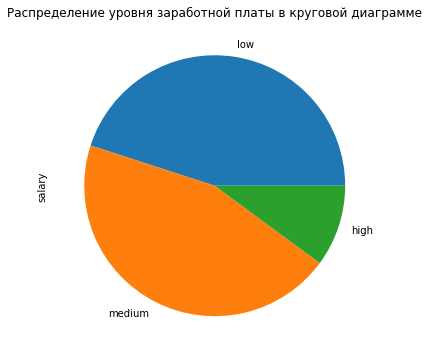

In [52]:
# круговая диаграмма
pie = salary.plot(kind='pie', title = 'Распределение уровня заработной платы в круговой диаграмме')

In [99]:
# преобразум данные и построим другую визуализацию
salary_ = data[data['left']==0].salary.value_counts().reset_index().pivot_table(columns = 'index', values = 'salary')
salary_

index,high,low,medium
salary,1155,5144,5129


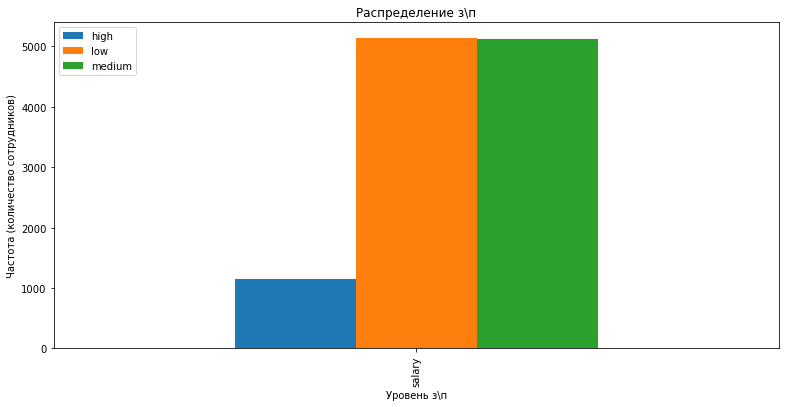

In [100]:
# столбчатая диаграмма
salary_.plot(kind='bar', title='Распределение з\п')
#xlabel='Уровень з\п'
#ylabel='Частота (количество сотрудников)'
plt.xlabel('Уровень з\п')
plt.ylabel('Частота (количество сотрудников)')
plt.legend(salary_, loc='upper left')

* Пункт 6

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [101]:
salary_department = data[data['left']==0][['salary', 'department', 'left']].groupby(by = ['department','salary']).count()
salary_department.columns = ['Count']
salary_department

Count
department  salary       
IT          high       79
            low       437
            medium    438
RandD       high       47
            low       309
            medium    310
accounting  high       69
            low       259
            medium    235
hr          high       39
            low       243
            medium    242
management  high      224
            low       121
            medium    194
marketing   high       71
            low       276
            medium    308
product_mng high       62
            low       346
            medium    296
sales       high      255
            low      1402
            medium   1469
support     high      133
            low       757
            medium    784
technical   high      176
            low       994
            medium    853

In [102]:
# преобразуем данные для лучшей визуализации
salary_department2 = salary_department.pivot_table(index = 'department', columns = 'salary', values = 'Count')
salary_department2

salary,high,low,medium
department,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


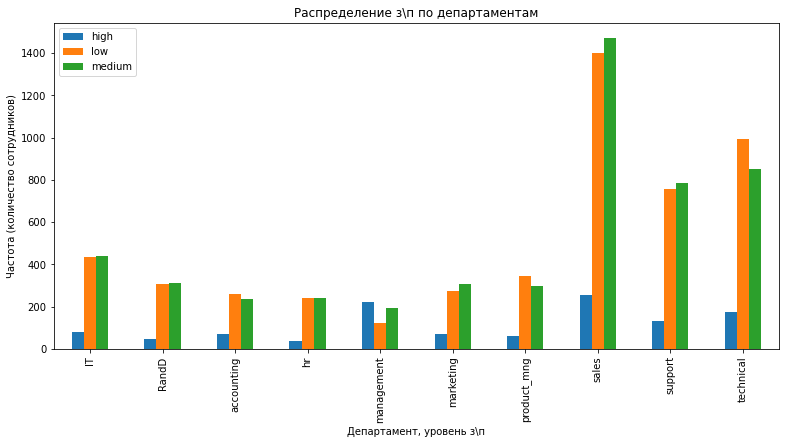

In [103]:
# столбчатая диаграмма
salary_department2.plot(kind='bar', title='Распределение з\п по департаментам')
#xlabel='Департамент, уровень з\п'
#ylabel='Частота (количество сотрудников)'
plt.xlabel('Департамент, уровень з\п')
plt.ylabel('Частота (количество сотрудников)')
plt.legend(salary_department2, loc='upper left')

* Пункт 7

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

(200.8332748743131, 199.86742118027485)

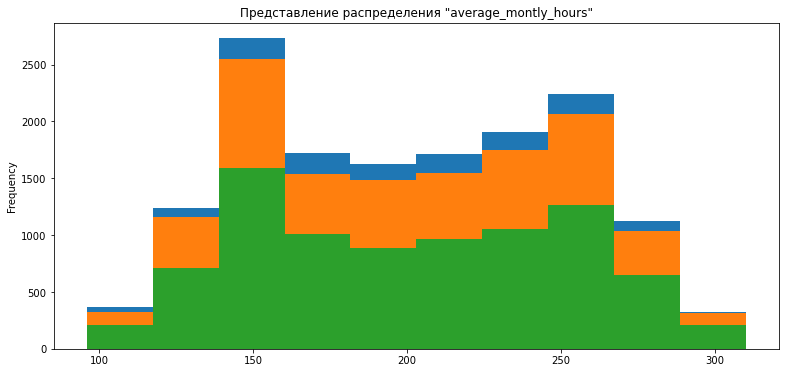

In [106]:
# посмотрим на распределение количества часов на рабочем месте
data['average_montly_hours'].plot(kind='hist', bins=10, title='Представление распределения "average_montly_hours"')
data.loc[data.salary!='high'].average_montly_hours.plot(kind='hist', bins=10, title='Представление распределения "average_montly_hours"')
data[(data.salary=='high')|(data.salary=='low')].average_montly_hours.plot(kind='hist', bins=10, title='Представление распределения "average_montly_hours"')
# распределение нормальное
# среднее значение
data[data.salary!='medium'].average_montly_hours.mean(), data.loc[data.salary=='high'].average_montly_hours.mean()

In [110]:
#H1 - зарплата высокая
#H2 - зарплата низкая
#A - при высокой зарплате больше время на рабочем месте
# P_A - полная вероятность
P_H1 = (data[data.salary!='medium'].salary.value_counts().high)/(data[data.salary!='medium'].salary.count())
P_H2 = (data[data.salary!='medium'].salary.value_counts().low)/(data[data.salary!='medium'].salary.count())

P_A_H1 = (data.loc[(data.salary=='high')&(data.average_montly_hours > 200.83)].average_montly_hours.count())/(data[data.salary!='medium'].average_montly_hours.count())
P_A_H2 = (data.loc[(data.salary=='low')&(data.average_montly_hours > 200.83)].average_montly_hours.count())/(data[data.salary!='medium'].average_montly_hours.count())

P_A = round((P_A_H1 * P_H1 + P_A_H2 * P_H2), 2)
P_A

0.37

Вероятность гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, равна 0,37. Гипотеза не подтверждается.

Из графика "Представление распределения "average_montly_hours"" видно, что распределение можно считать равномерным, средние (в данном случае допускается использовать этот параметр) относительно равны (близки), а значит нет явных различий.

In [11]:
import scipy.stats as stats

A = data.loc[data.salary=='high'].average_montly_hours
B = data.loc[data.salary!='low'].average_montly_hours

# приймем стандартно уровень значимости альфа = 5% (0,05)
# H0 - неразличные, схожие выборки

stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=-0.8409159296250578, pvalue=0.40051432778799423)

Значение pvalue=0.40051432778799423 больше уровня значимости 5%. 

Нулевую гипотезу отвергнуть не можем (недостаточно аргументов).

Искомая гипотеза не подтверждается.

* Пункт 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [111]:
def dismissed(data):   # расчет показателей по уволенным сотрудникам
    dismissed_staff_raising = round((data.loc[(data.left == 1)&(data.promotion_last_5years == 1)].left.count() * 100) / (data.loc[data.left == 1].left.count()), 2)
    dismissed_satisfaction_level = round(data.loc[(data.left == 1)].satisfaction_level.median(), 2)
    dismissed_number_project = int(data.loc[(data.left == 1)].number_project.median())
    
    print((f'dismissed_staff_raising = {dismissed_staff_raising} % '),  
          (f'dismissed_satisfaction_level = {dismissed_satisfaction_level}'), 
          (f'dismissed_number_project = {dismissed_number_project}'), 
          sep='\n')


dismissed(data)

dismissed_staff_raising = 0.53 % 
dismissed_satisfaction_level = 0.41
dismissed_number_project = 4


In [112]:
def working(data):   # расчет показателей по неуволенным (работающим) сотрудникам
    working_staff_raising = round((data.loc[(data.left == 0)&(data.promotion_last_5years == 1)].left.count() * 100) / (data.loc[data.left == 0].left.count()), 2)
    working_satisfaction_level = round(data.loc[(data.left == 0)].satisfaction_level.median(), 2)
    working_number_project = int(data.loc[(data.left == 0)].number_project.median())
    
    print((f'working_staff_raising = {working_staff_raising} % '),  
          (f'working_satisfaction_level = {working_satisfaction_level}'), 
          (f'working_number_project = {working_number_project}'), 
          sep='\n')


working(data)

working_staff_raising = 2.63 % 
working_satisfaction_level = 0.69
working_number_project = 4


* Пункт 9

Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборке.

In [204]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [130]:
# оставляем на вход непрерывные значения, убираем не коррелируемые с целевой переменной
x = data[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']]
y = np.array(data['left'])

In [132]:
x

,satisfaction_level,number_project,average_montly_hours,time_spend_company
0,0.38,2,157,3
1,0.80,5,262,6
2,0.11,7,272,4
3,0.72,5,223,5
4,0.37,2,159,3
...,...,...,...,...
14994,0.40,2,151,3
14995,0.37,2,160,3
14996,0.37,2,143,3
14997,0.11,6,280,4


In [133]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [135]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [136]:
lda = LinearDiscriminantAnalysis()

In [137]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [138]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [139]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [140]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,1,0
3746,0,0
3747,0,0
3748,0,1


In [141]:
# расчет точности - отношение верных прогнозов к общему количеству позиций

from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y_test, lda.predict(X_test))

0.7594666666666666

In [143]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.28883691, -0.18300767,  0.00510138,  0.22685835]])

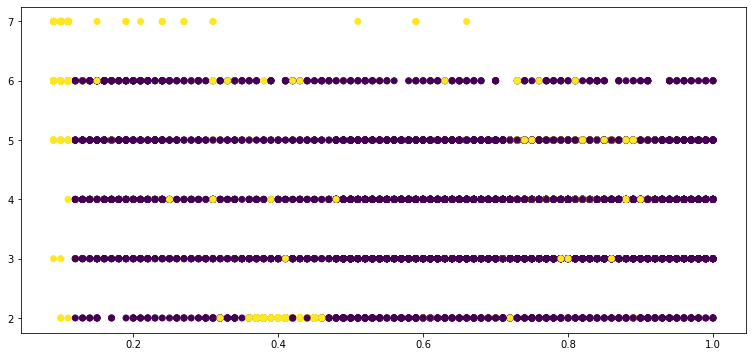

In [157]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['satisfaction_level'], X_train['number_project'], c=y_train)
plt.show()

In [151]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['satisfaction_level', 'number_project']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['satisfaction_level', 'number_project']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

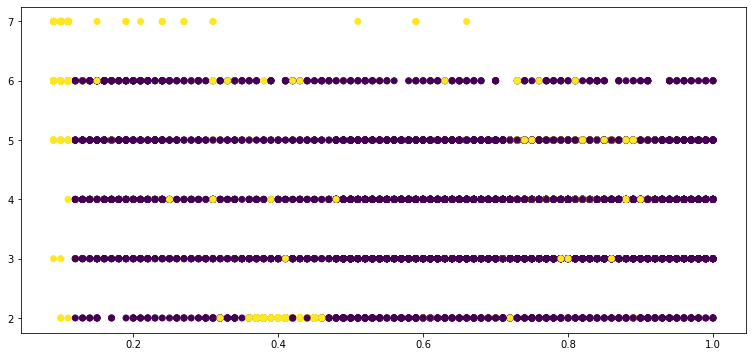

In [153]:
plt.scatter(small_train['satisfaction_level'], small_train['number_project'], c=sy_train)
plt.show()

In [158]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [159]:
# центроиды
lda_small.means_

array([[0.66421733, 3.77964128],
       [0.44171235, 3.88884716]])

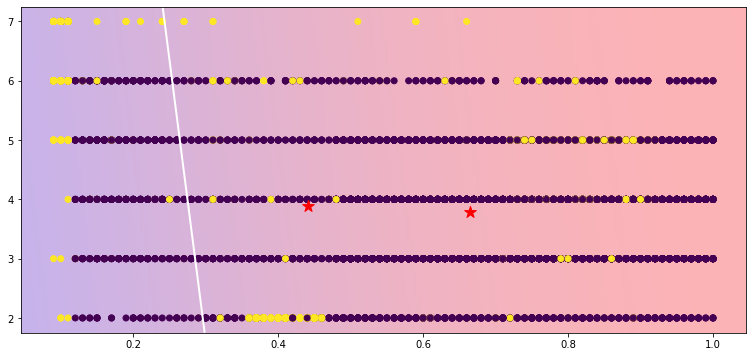

In [160]:
# сам scatter plot
plt.scatter(small_train['satisfaction_level'], small_train['number_project'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [161]:
# первый признак гораздо важнее второго для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-4.23500044, -0.04466116]])

In [162]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.7634666666666666

In [163]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [164]:
lr = LogisticRegression()

In [165]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [166]:
lr.predict(small_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [167]:
accuracy_score(sy_test, lr.predict(small_test))

0.7744

In [168]:
lr.coef_

array([[-3.830975  , -0.09178613]])

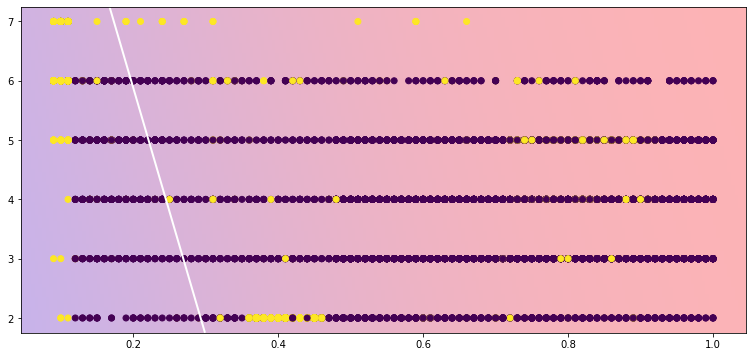

In [169]:
plt.scatter(small_train['satisfaction_level'], small_train['number_project'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

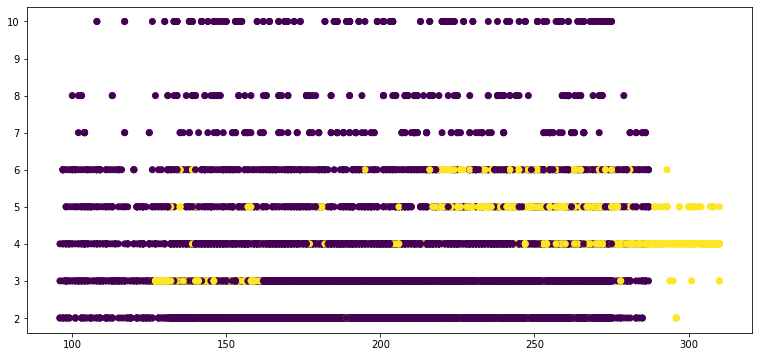

In [170]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['average_montly_hours'], X_train['time_spend_company'], c=y_train)
plt.show()

In [171]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['average_montly_hours', 'time_spend_company']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['average_montly_hours', 'time_spend_company']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

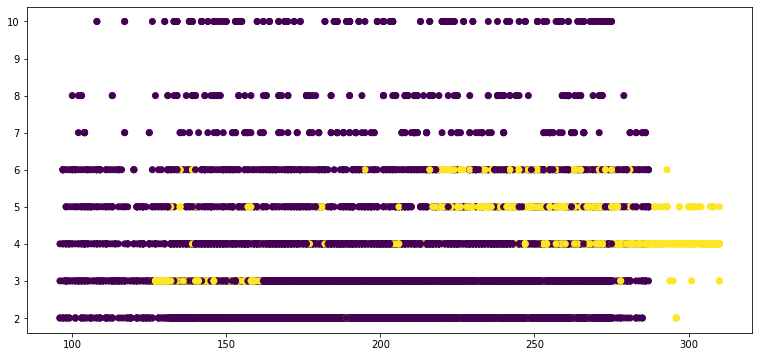

In [172]:
plt.scatter(small_train['average_montly_hours'], small_train['time_spend_company'], c=sy_train)
plt.show()

In [173]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [174]:
# центроиды
lda_small.means_

array([[199.11204286,   3.37712555],
       [208.48591814,   3.89673301]])

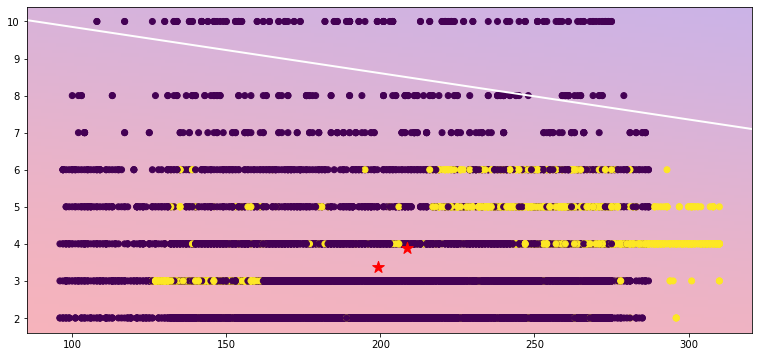

In [175]:
# сам scatter plot
plt.scatter(small_train['average_montly_hours'], small_train['time_spend_company'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [177]:
# второй признак важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[0.0029709 , 0.23796353]])

In [178]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.7424

In [179]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [180]:
lr = LogisticRegression()

In [181]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [182]:
lr.predict(small_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [183]:
accuracy_score(sy_test, lr.predict(small_test))

0.7458666666666667

In [184]:
lr.coef_

array([[0.00299728, 0.20947338]])

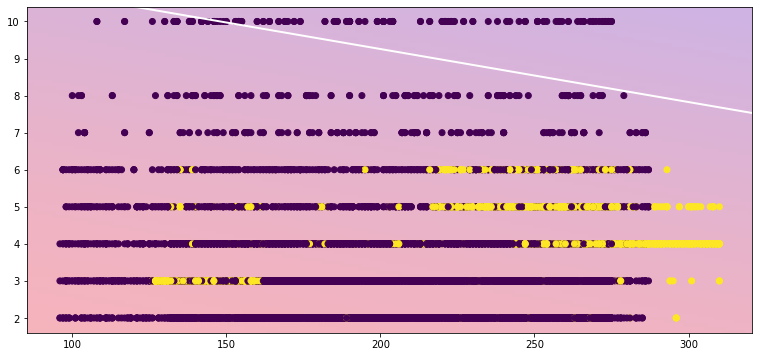

In [185]:
plt.scatter(small_train['average_montly_hours'], small_train['time_spend_company'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

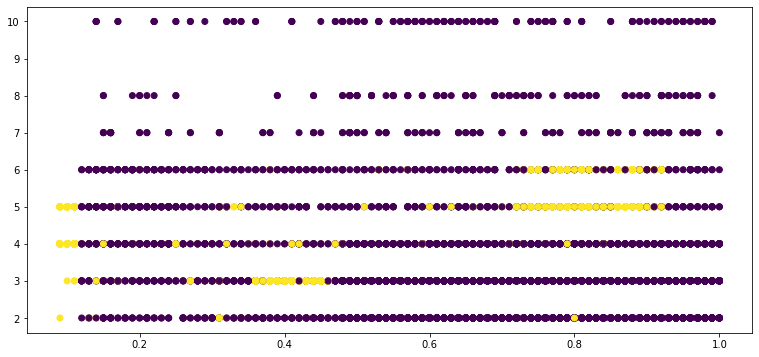

In [186]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['satisfaction_level'], X_train['time_spend_company'], c=y_train)
plt.show()

In [187]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['satisfaction_level', 'time_spend_company']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['satisfaction_level', 'time_spend_company']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

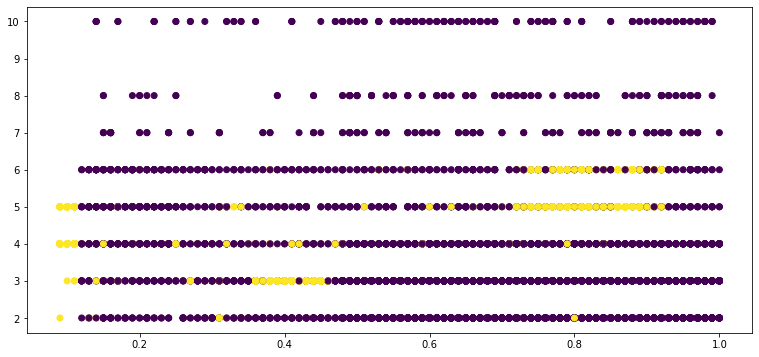

In [189]:
plt.scatter(small_train['satisfaction_level'], small_train['time_spend_company'], c=sy_train)
plt.show()

In [190]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [191]:
# центроиды
lda_small.means_

array([[0.66421733, 3.37712555],
       [0.44171235, 3.89673301]])

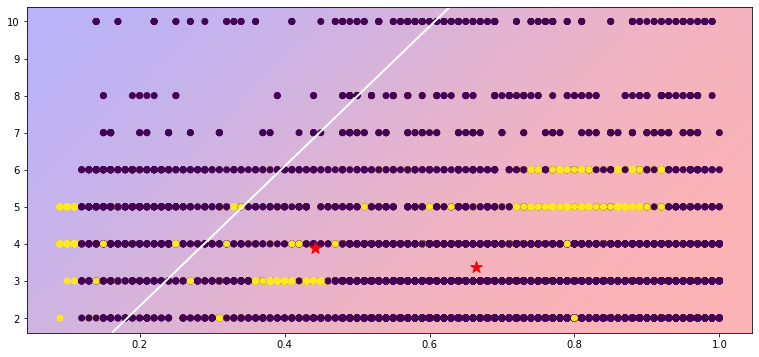

In [193]:
# сам scatter plot
plt.scatter(small_train['satisfaction_level'], small_train['time_spend_company'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [195]:
# первый признак гораздо важнее второго для кластеризации (это видно по визуализации)
lda_small.coef_

array([[-4.13539824,  0.21921371]])

In [196]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

0.7549333333333333

In [197]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [198]:
lr = LogisticRegression()

In [199]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [200]:
lr.predict(small_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [201]:
accuracy_score(sy_test, lr.predict(small_test))

0.7629333333333334

In [202]:
lr.coef_

array([[-3.58561022,  0.18742743]])

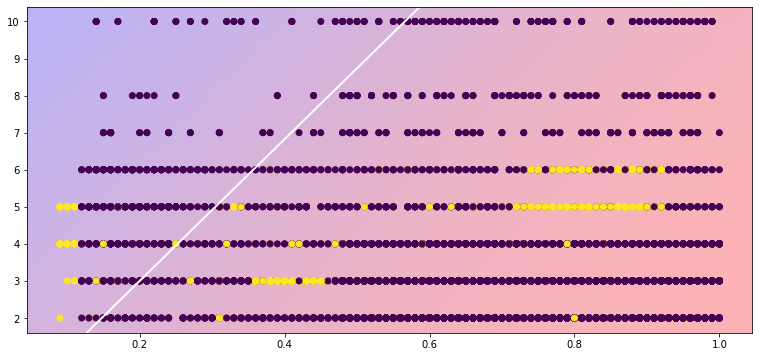

In [203]:
plt.scatter(small_train['satisfaction_level'], small_train['time_spend_company'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()